# Detección de Outliers

Los datos que usaremos en este notebook, "DS_Clase_13_Data_1.csv" y "DS_Clase_13_Data_2.csv",  fueron simulados con algún criterio desconocido. Uno de los archivos contiene "valores atípicos" y el otro no. El objetivo de este Notebook es que decidan en cuál de ellos hay outliers y apliquen las técnicas vistas para detectarlos.

## Ejercicios

Analizar, siguiendo las siguientes instrucciones, el archivo "DS_Clase_13_Data_1.csv". No se olviden de ir escribiendo las conclusiones a las que llegan a medida que avancen. Una vez completado, repetir para "DS_Clase_13_Data_2.csv".

1. Exploración de datos.
    1. Abrir los datos y explorarlos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos? Si los hay, ¿en qué región del dominio?
    2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, etc.
2. Reescaleo de datos
    1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Manejo de Outliers
    1. Aplicar la técnica del rango interquartílico y la regla de las tres sigmas para seleccionar outliers. ¿Cuántos valores selecciona cada técnica?¿Seleccionan los mismos valores?
    2. Supongamos que seleccionamos outliers y los descartamos. ¿Qué pasa si volvemos a aplicar estas técnicas?
    

### 1. Exploración de Datos

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [58]:
data = pd.read_csv('../datasets/DS_Encuentro_13_Data_1.csv')
median = data.median()
mean = data.Datos.mean()
std = data.Datos.std()
q25, q75 = data.Datos.quantile([.25, .75])
min_ = data.Datos.min()
max_ = data.Datos.max()
data.count()

Datos    1000
dtype: int64

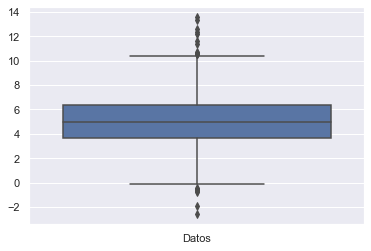

In [59]:
sns.boxplot(data=data)

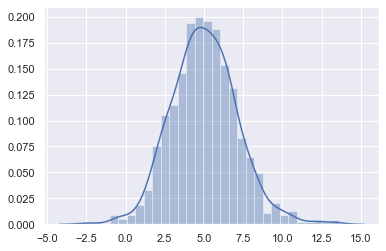

In [60]:
sns.distplot(data)

### 2. Reescaleo de datos

In [61]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
#data.head()
data_re = scaler.transform(data)
data['Datos_Reescalados'] = data_re
valor_medio = data.Datos.median()
std = data.Datos.std()
print(valor_medio)
print(std)

#data.head()

4.990536947069277
2.1061283981914283


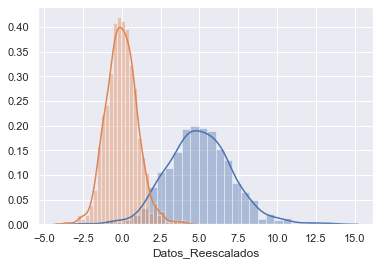

In [62]:
sns.distplot(data["Datos"])
sns.distplot(data["Datos_Reescalados"])

### 3. Manejo de outliers

1. Rango intercuartílico.

In [83]:
data_copy = data.copy()
q25,q75 = data_copy.Datos.quantile([.25, .75])
iqr = q75 - q25
minimo = q25 - 1.5 * iqr
maximo = q75 + 1.5 * iqr

print(q25,q75,iqr, minimo, maximo)

3.6279769872275214 6.360215379673109 2.7322383924455877 -0.47038060144086025 10.45857296834149


19


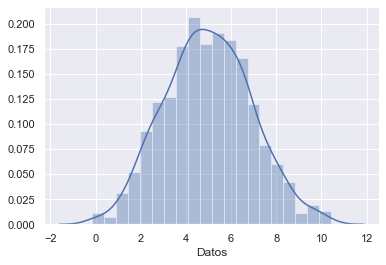

In [84]:
a = data_copy.Datos
mascara_outliers = np.logical_or(a > maximo, a < minimo)
print(mascara_outliers.sum())
data_filtered2 = data_copy[mascara_outliers == False]
sns.distplot(data_filtered2['Datos'])

(981, 2)


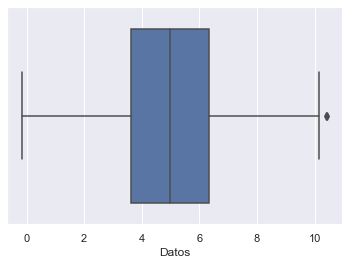

In [85]:
print(data_filtered2.shape)
sns.boxplot(data_filtered2['Datos'])

2. Regla de las tres sigmas

In [90]:

df_copy = data.copy()
valor_medio = df_copy.Datos.median()
std = df_copy.Datos.std()
minimo = valor_medio - 3 * std
maximo = valor_medio + 3 * std

In [91]:
mascara_outliers = np.logical_or(df_copy.Datos > maximo, df_copy.Datos < minimo)
data_filtered = df_copy[mascara_outliers == False]
mascara_outliers.sum()
data_filtered.shape

(991, 2)

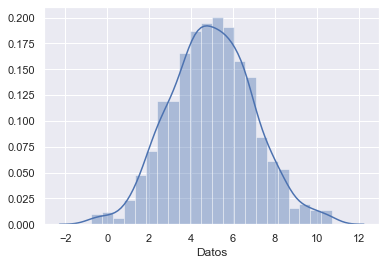

In [92]:
sns.distplot(data_filtered['Datos'])

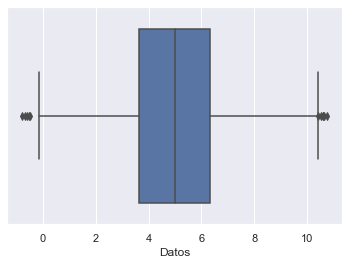

In [93]:
sns.boxplot(data_filtered['Datos'])

**Para pensar**: ¿se podía aplicar más fácilmente la regla de las tres sigmas usando la columna `Datos_Reescalados`?

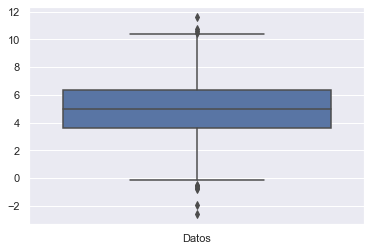

In [34]:
data2 = pd.read_csv('../datasets/DS_Encuentro_13_Data_2.csv')
data2.describe()
sns.boxplot(data=data2)

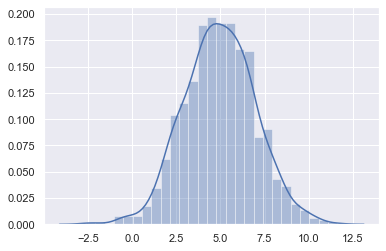

In [36]:
sns.distplot(data2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
#data.head()
data_re = scaler.transform(data)
data['Datos_Reescalados'] = data_re
valor_medio = data.Datos.median()
std = data.Datos.std()
print(valor_medio)
print(std)

